# Experimenting with reading v2 catalogue files

## Imports

In [3]:
import os
import subprocess
import yaml

from astropy.io import fits
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# Read BNS Table

In [4]:
bns = pd.read_csv("BNS-GW.txt", sep="\t", comment="#")

In [5]:
bns

,run,MergerID,RA,Dec,Distance,redshift,theta,n det,SNR,90%C.R.,50%C.R.
0,run0001,MergerID000001,-5.366,-29.906,327513.9,0.074,15.179,2,14.29,954.736,206.440
1,run0001,MergerID000017,-20.710,-29.623,284546.0,0.064,28.009,2,13.01,1366.475,415.975
2,run0001,MergerID000023,125.118,3.213,247975.2,0.056,18.241,3,14.19,116.662,30.690
3,run0001,MergerID000031,-131.186,-1.899,114730.4,0.026,43.462,2,12.73,244.038,60.521
4,run0001,MergerID000048,-62.606,-53.594,136794.2,0.031,8.754,3,32.29,19.779,5.353
...,...,...,...,...,...,...,...,...,...,...,...
18944,run0896,MergerID000192,160.426,20.200,169753.7,0.038,14.139,2,17.72,114.337,30.893
18945,run0896,MergerID000262,-20.694,-49.914,164953.8,0.037,43.284,2,14.09,502.317,100.401
18946,run0896,MergerID000285,19.435,-39.677,143054.0,0.032,38.421,2,15.85,117.603,31.729
18947,run0896,MergerID000312,116.222,71.323,158820.5,0.036,48.982,2,12.73,2483.575,152.673


In [11]:
f = fits.open("./GammaCatalogV2.0/run0639_ID000222.fits")

In [51]:
f[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  328 / length of dimension 1                          
NAXIS2  =                   70 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   41 / number of table fields                         
UNITS   = 'ph/cm2/s/GeV'                                                        
EXTNAME = 'SPECTRA '           / extension name                                 
TTYPE1  = 'col0    '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'col1    '        

In [41]:
f["ENERGIES"].data.field(0)

array([1.0000000e+00, 1.2589254e+00, 1.5848932e+00, 1.9952623e+00,
       2.5118864e+00, 3.1622777e+00, 3.9810717e+00, 5.0118723e+00,
       6.3095737e+00, 7.9432821e+00, 1.0000000e+01, 1.2589254e+01,
       1.5848932e+01, 1.9952623e+01, 2.5118864e+01, 3.1622776e+01,
       3.9810719e+01, 5.0118725e+01, 6.3095734e+01, 7.9432823e+01,
       1.0000000e+02, 1.2589254e+02, 1.5848932e+02, 1.9952623e+02,
       2.5118864e+02, 3.1622775e+02, 3.9810718e+02, 5.0118723e+02,
       6.3095734e+02, 7.9432825e+02, 1.0000000e+03, 1.2589254e+03,
       1.5848932e+03, 1.9952623e+03, 2.5118865e+03, 3.1622776e+03,
       3.9810718e+03, 5.0118726e+03, 6.3095732e+03, 7.9432822e+03,
       1.0000000e+04], dtype=float32)

Check out:
```
16127 run0639 MergerID000222 89.832
 1197 run0043 MergerID000291 89.943
 6264 run0222 MergerID000073 89.995
13642 run0514 MergerID000406 89.997
```

filename template:
`runXXXX_IDXXXXXX.fits`

## LCs

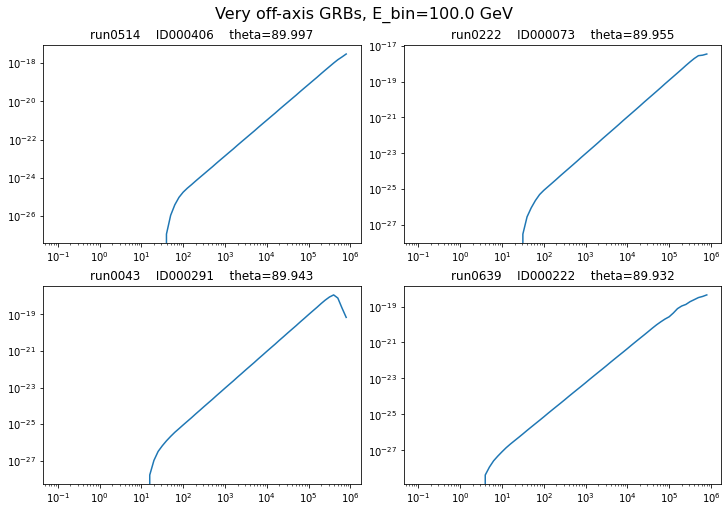

In [54]:
bns = pd.read_csv("BNS-GW.txt", sep="\t", comment="#")

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10, 7))
axs = axs.flatten()

plt.rcParams['figure.facecolor'] = 'white'

e_bin = 20

for grb in range(4):
    grb_row = bns.sort_values(by="theta").iloc[len(bns) - grb - 1]
    run = grb_row.run
    merger_id = grb_row.MergerID.strip("Merger")
    theta = grb_row.theta
    filename = f"./GammaCatalogV2.0/{run}_{merger_id}.fits"
    
    with fits.open(filename) as file:
        # label = f"{round(file['TIMES'].data[i][0])}s - {round(file['TIMES'].data[i][1])}s"
        axs[grb].loglog(file["TIMES"].data.field(0), file["SPECTRA"].data.field(e_bin), label=label)
        axs[grb].set_title(f"{run}    {merger_id}    theta={theta}")
        axs[grb].set_xlabel = "t (s)"
        axs[grb].set_ylabel = "spectrum (ph/cm2/s/GeV)"
    
# handles, labels = axs[grb].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower right')
        fig.suptitle(f"Very off-axis GRBs, E_bin={file['ENERGIES'].data[e_bin].field(0)} GeV", fontsize=16)

#plt.savefig("./off-axis-plots/LC-offaxis-mergers.png")
            
plt.show()    

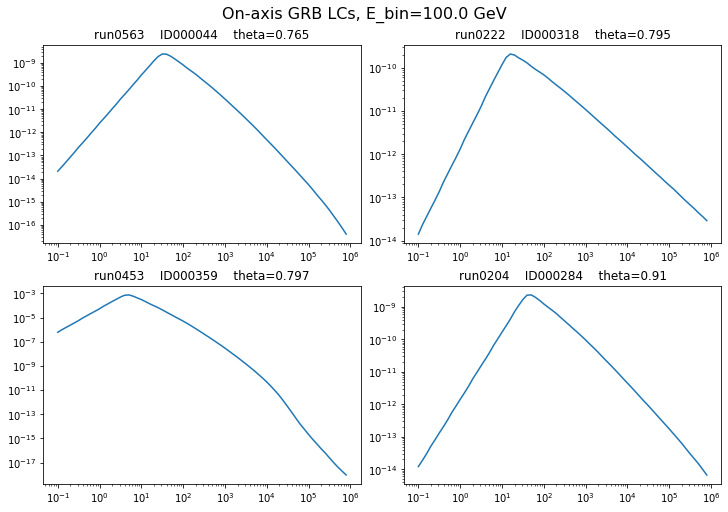

In [56]:
bns = pd.read_csv("BNS-GW.txt", sep="\t", comment="#")

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10, 7))
axs = axs.flatten()

plt.rcParams['figure.facecolor'] = 'white'

e_bin = 20

for grb in range(4):
    grb_row = bns.sort_values(by="theta").iloc[grb + 1]
    run = grb_row.run
    merger_id = grb_row.MergerID.strip("Merger")
    theta = grb_row.theta
    filename = f"./GammaCatalogV2.0/{run}_{merger_id}.fits"
    
    with fits.open(filename) as file:
        # label = f"{round(file['TIMES'].data[i][0])}s - {round(file['TIMES'].data[i][1])}s"
        axs[grb].loglog(file["TIMES"].data.field(0), file["SPECTRA"].data.field(e_bin), label=label)
        axs[grb].set_title(f"{run}    {merger_id}    theta={theta}")
    
# handles, labels = axs[grb].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower right')
        fig.suptitle(f"On-axis GRB LCs, E_bin={file['ENERGIES'].data[e_bin].field(0)} GeV", fontsize=16)

plt.savefig("./off-axis-plots/LC-onaxis-mergers.png")
            
plt.show()    

## Spectra

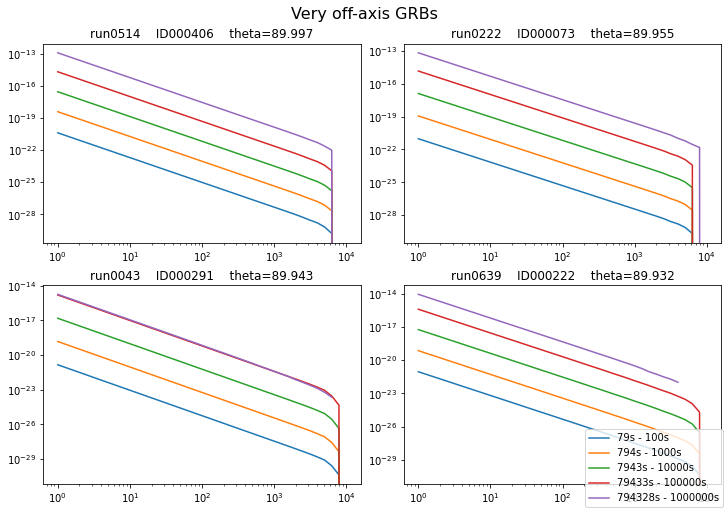

In [152]:
bns = pd.read_csv("BNS-GW.txt", sep="\t", comment="#")

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10, 7))
axs = axs.flatten()

plt.rcParams['figure.facecolor'] = 'white'

for grb in range(4):
    grb_row = bns.sort_values(by="theta").iloc[len(bns) - grb - 1]
    run = grb_row.run
    merger_id = grb_row.MergerID.strip("Merger")
    theta = grb_row.theta
    filename = f"./GammaCatalogV2.0/{run}_{merger_id}.fits"
    
    with fits.open(filename) as file:
        for i in [29, 39, 49, 59, 69]:
            label = f"{round(file['TIMES'].data[i][0])}s - {round(file['TIMES'].data[i][1])}s"
            axs[grb].loglog(file["ENERGIES"].data, file["SPECTRA"].data[i], label=label)
            axs[grb].set_title(f"{run}    {merger_id}    theta={theta}")
    
handles, labels = axs[grb].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')
fig.suptitle('Very off-axis GRBs', fontsize=16)

plt.savefig("./off-axis-plots/offaxis-mergers.png")
            
plt.show()    

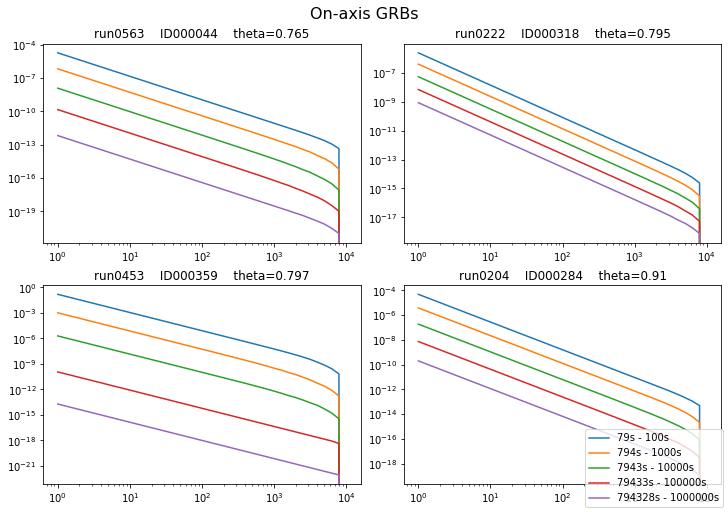

In [151]:
bns = pd.read_csv("BNS-GW.txt", sep="\t", comment="#")

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10, 7))
axs = axs.flatten()

plt.rcParams['figure.facecolor'] = 'white'

for grb in range(4):
    grb_row = bns.sort_values(by="theta").iloc[grb + 1]
    run = grb_row.run
    merger_id = grb_row.MergerID.strip("Merger")
    theta = grb_row.theta
    filename = f"./GammaCatalogV2.0/{run}_{merger_id}.fits"
    
    with fits.open(filename) as file:
        for i in [29, 39, 49, 59, 69]:
            label = f"{round(file['TIMES'].data[i][0])}s - {round(file['TIMES'].data[i][1])}s"
            axs[grb].loglog(file["ENERGIES"].data, file["SPECTRA"].data[i], label=label)
            axs[grb].set_title(f"{run}    {merger_id}    theta={theta}")
    
handles, labels = axs[grb].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')
fig.suptitle('On-axis GRBs', fontsize=16)

plt.savefig("./off-axis-plots/onaxis-mergers.png")

plt.show()    